In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print("Library Versions:")
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('tensorflow:',tf.__version__)
print('tensorflow probability:', tfp.__version__)

2023-11-21 17:56:32.675692: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 17:56:32.737450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 17:56:34.248496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Library Versions:
numpy: 1.24.3
pandas: 1.5.3
tensorflow: 2.13.0
tensorflow probability: 0.21.0


In [4]:
n_epochs = 200
verbose_option = True

In [5]:
metrics = {}

# Classification for Ship Detection


Load Ship Detection Dataset

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ROOT_PATH = "shipsnet"
LR = 1e-3
BATCH_SIZE=1000

def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(ROOT_PATH,
                            labels = 'inferred',
                            label_mode = 'categorical',
                            class_names = None,
                            color_mode = "rgb",
                            batch_size = BATCH_SIZE,
                            image_size = (80, 80),
                            shuffle = True,
                            seed = 42,
                            subset="both",
                            validation_split = 0.2,
)

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

train_dataset_p = train_dataset.cache()
train_dataset_p = train_dataset_p.prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Using 800 files for validation.


2023-11-21 17:56:38.009726: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46497 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:1a:00.0, compute capability: 8.9


Using Tensoflow, perform  non-linear binary classification model for the classification dataset.

In [7]:
inputs = layers.Input(shape=(80,80,3))
flat = layers.Flatten()(inputs)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

model = keras.Model(inputs=inputs, outputs=p)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [8]:
model.fit(train_dataset_p, epochs=n_epochs, verbose=True)

Epoch 1/200


2023-11-21 17:56:42.853573: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-21 17:56:42.862942: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f40e2f15480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-21 17:56:42.862967: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2023-11-21 17:56:42.869152: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-21 17:56:43.098986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-21 17:56:43.489148: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

4/4 [==============================] - 6s 19ms/step - loss: 2.9032 - categorical_accuracy: 0.4369 - categorical_crossentropy: 2.9032
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.9223 - categorical_accuracy: 0.7572 - categorical_crossentropy: 0.9223
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.6434 - categorical_accuracy: 0.5844 - categorical_crossentropy: 0.6434
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.6410 - categorical_accuracy: 0.7578 - categorical_crossentropy: 0.6410
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5491 - categorical_accuracy: 0.7841 - categorical_crossentropy: 0.5491
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5382 - categorical_accuracy: 0.7688 - categorical_crossentropy: 0.5382
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4927 - categorical_accuracy: 0.7775 - categorical_crossentropy: 0.49

4/4 [==============================] - 0s 16ms/step - loss: 0.2585 - categorical_accuracy: 0.8966 - categorical_crossentropy: 0.2585
Epoch 58/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2573 - categorical_accuracy: 0.8969 - categorical_crossentropy: 0.2573
Epoch 59/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2561 - categorical_accuracy: 0.8969 - categorical_crossentropy: 0.2561
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2549 - categorical_accuracy: 0.8972 - categorical_crossentropy: 0.2549
Epoch 61/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2538 - categorical_accuracy: 0.8969 - categorical_crossentropy: 0.2538
Epoch 62/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2527 - categorical_accuracy: 0.8975 - categorical_crossentropy: 0.2527
Epoch 63/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2515 - categorical_accuracy: 0.8988 - categorical_crossentropy

4/4 [==============================] - 0s 16ms/step - loss: 0.2108 - categorical_accuracy: 0.9162 - categorical_crossentropy: 0.2108
Epoch 114/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2088 - categorical_accuracy: 0.9169 - categorical_crossentropy: 0.2088
Epoch 115/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2068 - categorical_accuracy: 0.9178 - categorical_crossentropy: 0.2068
Epoch 116/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2050 - categorical_accuracy: 0.9187 - categorical_crossentropy: 0.2050
Epoch 117/200
4/4 [==============================] - 0s 17ms/step - loss: 0.2035 - categorical_accuracy: 0.9197 - categorical_crossentropy: 0.2035
Epoch 118/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2023 - categorical_accuracy: 0.9206 - categorical_crossentropy: 0.2023
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2015 - categorical_accuracy: 0.9209 - categorical_crosse

4/4 [==============================] - 0s 17ms/step - loss: 0.2122 - categorical_accuracy: 0.9166 - categorical_crossentropy: 0.2122
Epoch 169/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2398 - categorical_accuracy: 0.9084 - categorical_crossentropy: 0.2398
Epoch 170/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3065 - categorical_accuracy: 0.8863 - categorical_crossentropy: 0.3065
Epoch 171/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4567 - categorical_accuracy: 0.8363 - categorical_crossentropy: 0.4567
Epoch 172/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5461 - categorical_accuracy: 0.8453 - categorical_crossentropy: 0.5461
Epoch 173/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2783 - categorical_accuracy: 0.9034 - categorical_crossentropy: 0.2783
Epoch 174/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2190 - categorical_accuracy: 0.9181 - categorical_crosse

Evaluate the classification model on the test data

In [9]:
metrics['Original Model'] = model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 1s 753ms/step - loss: 0.2177 - categorical_accuracy: 0.9150 - categorical_crossentropy: 0.2177
Original Model                                     Accuracy: 0.9150000214576721                                


In [10]:
train_examples = []
train_labels = []
for example, label in train_dataset_p.as_numpy_iterator():
    train_examples.append(example)
    train_labels.append(label)
train_examples = tf.concat(train_examples, axis=0)
train_labels = tf.concat(train_labels, axis=0)
print(train_examples.get_shape())
print(train_labels.get_shape())

(3200, 80, 80, 3)
(3200, 2)


In [11]:
examples, labels = list(test_dataset.as_numpy_iterator())[0]

In [12]:
model(np.reshape(examples[5],[1,80,80,3])).numpy()[0,0]

-14.474423

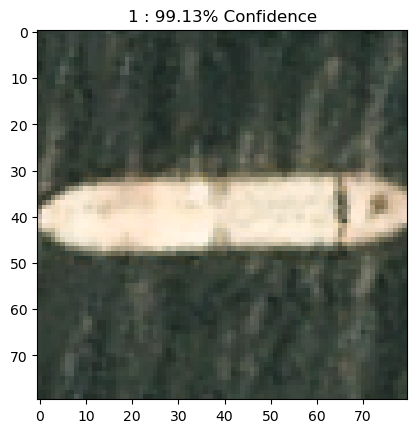

In [13]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

# Gradient Matching

In [244]:
from art.attacks.poisoning import GradientMatchingAttack

In [245]:
inputs = layers.Input(shape=(80,80,3))
flat = layers.Flatten()(inputs)
h1 = layers.Dense(100, activation="relu")(flat)
h2 = layers.Dense(100, activation="relu")(h1)
p = layers.Dense(2,activation='linear')(h2)

bb_model = keras.Model(inputs=inputs, outputs=p)

bb_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [246]:
from art.estimators.classification import TensorFlowV2Classifier
classifier = TensorFlowV2Classifier(
    model=bb_model,
    loss_object=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(LR),
    nb_classes=2,
    input_shape=(80, 80, 3),
    clip_values=(0, 1),
)
gradmatching = GradientMatchingAttack(classifier=classifier, 
                                      percent_poison=0.3, 
                                      epsilon=0.1, 
                                      max_trials=8, 
                                      max_epochs=250, 
                                      learning_rate_schedule=([0.1, 0.01, 0.001, 0.0001], [100, 150, 200, 220]), 
                                      batch_size=512, 
                                      clip_values=(0, 1.0), 
                                      verbose=1)

In [247]:
ship_idx = np.where(train_labels[:,1]==1)

In [248]:
print(ship_idx[0].shape)

(777,)


In [249]:
opp_labels = []
opp_x = []
# trigger to misclassify 1 examples as 0 (ship as not ship)
for index in ship_idx[0]:
    opp_labels.append(train_labels[index])
    opp_x.append(1-train_examples[index])

ol_np = np.array(opp_labels)
ox_np = np.array(opp_x)

print(ol_np.shape)
print(ox_np.shape)

(777, 2)
(777, 80, 80, 3)


In [250]:
adv_ex = gradmatching.poison(x_trigger=ox_np,
                             y_trigger=ol_np,
                             x_train=train_examples,
                             y_train=train_labels)

  0%|          | 0/8 [00:00<?, ?it/s]

The following Variables were used a Lambda layer's call (lambda_17), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_19), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_21), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_23), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_25), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_27), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_29), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
The following Variables were used a Lambda layer's call (lambda_31), but
are not present in its tracked objects:
  <tf.Variable 'dense_127/kernel:0' shape=(19200, 100) dtype=float32>
  <tf.Variable 'dense_127/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_128/kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'dense_128/bias:0' shape=(100,) dtype=float32>
  <tf.Variable 'dense_129/kernel:0' shape=(100, 2) dtype=float32>
  <tf.Variable 'dense_129/bias:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


0epoch [00:00, ?epoch/s]

2/2 [==============================] - 0s 9ms/step
Best B-score: 0.23719922


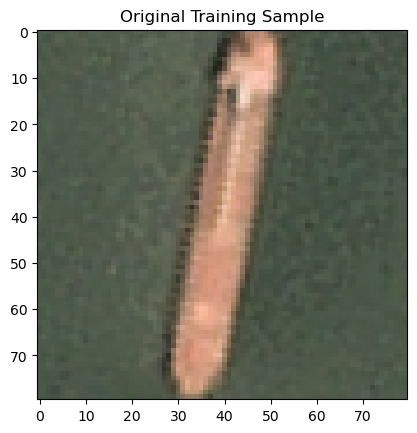

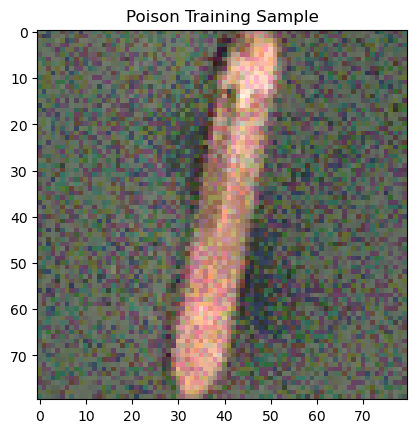

In [251]:
%matplotlib inline

plt.figure()
adv_example = train_examples[4]
plt.imshow(np.clip(adv_example,0,255))
plt.title('Original Training Sample')
plt.show()

plt.figure()
adv_example = adv_ex[0][4]
plt.imshow(np.clip(adv_example,0,255))
plt.title('Poison Training Sample')
plt.show()

In [252]:
# make tf.dataset of poisoned examples
poisoned_train_ds = tf.data.Dataset.from_tensor_slices((adv_ex[0], adv_ex[1]))

poisoned_train_ds = poisoned_train_ds.shuffle(100).batch(BATCH_SIZE)

In [253]:
for example, label in poisoned_train_ds.as_numpy_iterator():
    print(f'example: {example.shape}, label: {label.shape}')

example: (1000, 80, 80, 3), label: (1000, 2)
example: (1000, 80, 80, 3), label: (1000, 2)
example: (1000, 80, 80, 3), label: (1000, 2)
example: (200, 80, 80, 3), label: (200, 2)


In [254]:
poison_examples = []
poison_labels = []
for example, label in poisoned_train_ds.as_numpy_iterator():
    poison_examples.append(example)
    poison_labels.append(label)
poison_examples = tf.concat(poison_examples, axis=0)
poison_labels = tf.concat(poison_labels, axis=0)

In [255]:
model.fit(poisoned_train_ds, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 0s 29ms/step - loss: 9.4399 - categorical_accuracy: 0.4556 - categorical_crossentropy: 9.4399
Epoch 2/200
4/4 [==============================] - 0s 29ms/step - loss: 8.9637 - categorical_accuracy: 0.7572 - categorical_crossentropy: 8.9637
Epoch 3/200
4/4 [==============================] - 0s 30ms/step - loss: 3.4112 - categorical_accuracy: 0.7222 - categorical_crossentropy: 3.4112
Epoch 4/200
4/4 [==============================] - 0s 29ms/step - loss: 2.5501 - categorical_accuracy: 0.4447 - categorical_crossentropy: 2.5501
Epoch 5/200
4/4 [==============================] - 0s 30ms/step - loss: 2.5629 - categorical_accuracy: 0.7572 - categorical_crossentropy: 2.5629
Epoch 6/200
4/4 [==============================] - 0s 28ms/step - loss: 1.1862 - categorical_accuracy: 0.7572 - categorical_crossentropy: 1.1862
Epoch 7/200
4/4 [==============================] - 0s 29ms/step - loss: 0.7110 - categorical_accuracy: 0.4944 - categorical_crosse

4/4 [==============================] - 0s 28ms/step - loss: 0.0347 - categorical_accuracy: 0.9919 - categorical_crossentropy: 0.0347
Epoch 58/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0339 - categorical_accuracy: 0.9919 - categorical_crossentropy: 0.0339
Epoch 59/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0343 - categorical_accuracy: 0.9919 - categorical_crossentropy: 0.0343
Epoch 60/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0327 - categorical_accuracy: 0.9919 - categorical_crossentropy: 0.0327
Epoch 61/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0325 - categorical_accuracy: 0.9919 - categorical_crossentropy: 0.0325
Epoch 62/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0326 - categorical_accuracy: 0.9928 - categorical_crossentropy: 0.0326
Epoch 63/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0316 - categorical_accuracy: 0.9922 - categorical_crossentropy

4/4 [==============================] - 0s 29ms/step - loss: 0.0139 - categorical_accuracy: 0.9978 - categorical_crossentropy: 0.0139
Epoch 114/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0138 - categorical_accuracy: 0.9978 - categorical_crossentropy: 0.0138
Epoch 115/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0134 - categorical_accuracy: 0.9978 - categorical_crossentropy: 0.0134
Epoch 116/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0133 - categorical_accuracy: 0.9978 - categorical_crossentropy: 0.0133
Epoch 117/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0127 - categorical_accuracy: 0.9978 - categorical_crossentropy: 0.0127
Epoch 118/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0126 - categorical_accuracy: 0.9978 - categorical_crossentropy: 0.0126
Epoch 119/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0132 - categorical_accuracy: 0.9978 - categorical_crosse

4/4 [==============================] - 0s 29ms/step - loss: 0.0052 - categorical_accuracy: 0.9987 - categorical_crossentropy: 0.0052
Epoch 169/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0047 - categorical_accuracy: 0.9994 - categorical_crossentropy: 0.0047
Epoch 170/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0055 - categorical_accuracy: 0.9987 - categorical_crossentropy: 0.0055
Epoch 171/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0049 - categorical_accuracy: 0.9994 - categorical_crossentropy: 0.0049
Epoch 172/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0053 - categorical_accuracy: 0.9991 - categorical_crossentropy: 0.0053
Epoch 173/200
4/4 [==============================] - 0s 29ms/step - loss: 0.0048 - categorical_accuracy: 0.9987 - categorical_crossentropy: 0.0048
Epoch 174/200
4/4 [==============================] - 0s 28ms/step - loss: 0.0043 - categorical_accuracy: 0.9994 - categorical_crosse

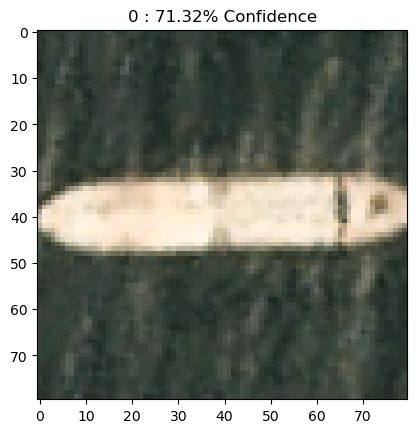

In [256]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [257]:
metrics['Original with Gradient Matching'] = model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 33ms/step - loss: 0.8368 - categorical_accuracy: 0.7975 - categorical_crossentropy: 0.8368
Original Model                                     Accuracy: 0.9150000214576721                                
Original with Gradient Matching                    Accuracy: 0.7975000143051147                                


# Finite Aggregation

In [258]:
k = 2
d = 2

def hsplit(dataset, k, d):
    images, labels = dataset
    num_partitions = k*d
    
    image_partitions = np.split(images, k*d, axis=0)
    label_partitions = np.split(labels, k*d, axis=0)
    print(f'image partition: {image_partitions[0].shape}')
    print(f'label partitions: {label_partitions[0].shape}')

    return image_partitions, label_partitions

def hspread(x, y, k, d):
    classifier_training_sets = {}
    # pick set r from k*d
    Rset = [0,3]
    # for k*d partitions assign d partitions to each j=k*d classifier
    for j in np.arange(k*d):
        print(f'model: {j}')
        subset_labels = []
        subset_images = []
        
        # r_t from set r is offset for partition assignment 
        for r_t in Rset:
            p = np.mod((j+r_t), (k*d))
            print(f'partition: {p}')
            # add corresponding partitions to be assigned to one classifier
            subset_images.append(x[p])
            subset_labels.append(y[p])
        
        # collapse partitions into one coherent dataset for one classifier
        subset_images_np = np.vstack(np.array(subset_images))
        subset_labels_np = np.vstack(np.array(subset_labels))
        
        print(f'images: {subset_images_np.shape}')
        print(f'labels: {subset_labels_np.shape}')
        
        # add to training set dictionary
        classifier_training_sets[j] = (subset_images_np, subset_labels_np)
    return classifier_training_sets

In [259]:
x_train = train_examples.numpy()
y_train = train_labels.numpy()

x_partitions, y_partitions = hsplit((x_train, y_train), k, d)

print(f'Number of partitions: {len(x_partitions)}')
for i in range(k*d):
    print(f'Partition {i} - x shape: {x_partitions[i].shape}, y shape: {y_partitions[i].shape}')

image partition: (800, 80, 80, 3)
label partitions: (800, 2)
Number of partitions: 4
Partition 0 - x shape: (800, 80, 80, 3), y shape: (800, 2)
Partition 1 - x shape: (800, 80, 80, 3), y shape: (800, 2)
Partition 2 - x shape: (800, 80, 80, 3), y shape: (800, 2)
Partition 3 - x shape: (800, 80, 80, 3), y shape: (800, 2)


In [260]:
training_sets = hspread(x_partitions, y_partitions, k, d)

model: 0
partition: 0
partition: 3
images: (1600, 80, 80, 3)
labels: (1600, 2)
model: 1
partition: 1
partition: 0
images: (1600, 80, 80, 3)
labels: (1600, 2)
model: 2
partition: 2
partition: 1
images: (1600, 80, 80, 3)
labels: (1600, 2)
model: 3
partition: 3
partition: 2
images: (1600, 80, 80, 3)
labels: (1600, 2)


In [261]:
training_sets[1][0].shape

(1600, 80, 80, 3)

In [262]:
training_sets[1][1].shape

(1600, 2)

In [263]:
from tqdm import tqdm

models = []
for i in tqdm(range(k*d)):
    inputs = layers.Input(shape=(80,80,3))
    noise = layers.GaussianNoise(stddev=1)(inputs)
    flat = layers.Flatten()(noise)
    h1 = layers.Dense(50, activation="relu")(flat)
    h2 = layers.Dense(50, activation="relu")(h1)
    h3 = layers.Dense(50, activation="relu")(h2)
    p = layers.Dense(2,activation='linear')(h3)

    sub_model = keras.Model(inputs=inputs, outputs=p)

    sub_model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(LR),
        metrics=[tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
    )
    
    x_train = tf.convert_to_tensor(training_sets[i][0])
    y_train = tf.convert_to_tensor(training_sets[i][1])
    
    sub_model.fit(x_train, y_train, epochs=n_epochs, batch_size=800, verbose=0)
    models.append(sub_model)

100%|█████████████████████████████████████████████████████████| 4/4 [01:11<00:00, 17.80s/it]


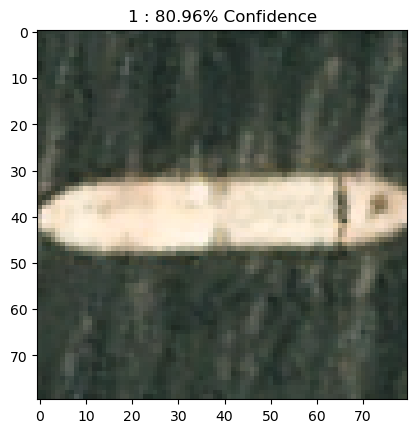

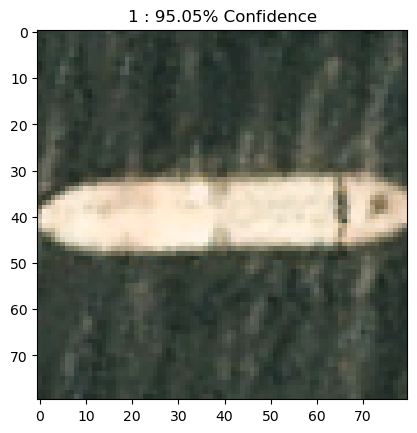

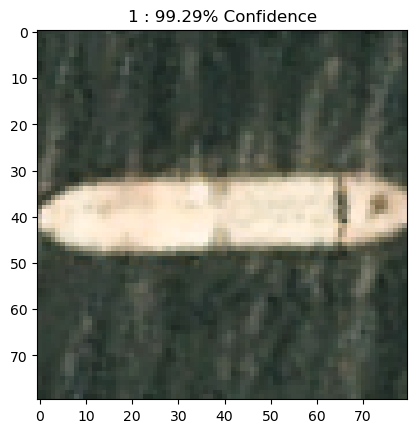

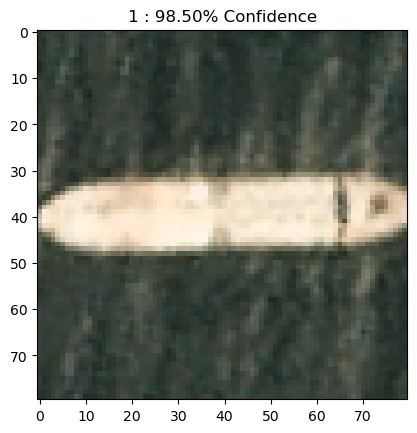

In [264]:
%matplotlib inline
for i in range(len(models)):
    plt.figure()
    plt.imshow(examples[5])
    confidence = tf.nn.softmax(models[i](np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
    if confidence < 0.5:
        pred = 0
        confidence = 1. - confidence
    else:
        pred = 1
    plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
    plt.show()

In [265]:
from scipy import stats

ensemble_predictions = np.stack([models[i](examples) for i in range(len(models))])
print(ensemble_predictions.shape)

(4, 800, 2)


In [266]:
pred_classes = np.argmax(ensemble_predictions, axis=2)
print(pred_classes.shape)

(4, 800)


In [267]:
class_predictions, count = stats.mode(pred_classes, axis=0)
print(mode.shape)

(800,)


In [268]:
ensemble_confidence = count/(len(models))
for i in range(10):
    print(f'Prediction: {class_predictions[i]}, Vote Confidence: {ensemble_confidence[i]}')

Prediction: 1, Vote Confidence: 1.0
Prediction: 1, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 1, Vote Confidence: 1.0
Prediction: 1, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 1, Vote Confidence: 0.75
Prediction: 0, Vote Confidence: 1.0


In [269]:
print(f'Prediction: {class_predictions[5]}, Vote Confidence: {ensemble_confidence[5]}')

Prediction: 1, Vote Confidence: 1.0


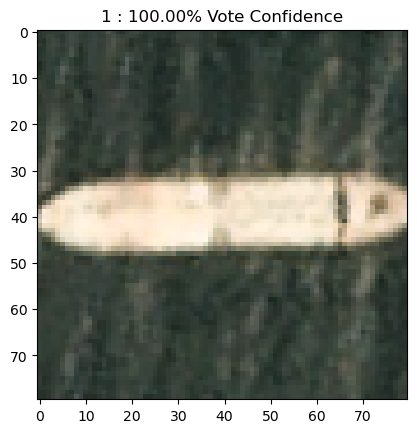

In [270]:
plt.figure()
plt.imshow(examples[5])
confidence = ensemble_confidence[5]
pred = class_predictions[5]
plt.title('{} : {:.2f}% Vote Confidence'.format(str(pred), confidence*100))
plt.show()

# Finite Aggregation w/ poisoned dataset

In [271]:
x_train_p = poison_examples.numpy()
y_train_p = poison_labels.numpy()

x_partitions, y_partitions = hsplit((x_train_p, y_train_p), k, d)

image partition: (800, 80, 80, 3)
label partitions: (800, 2)


In [272]:
poisoned_training_sets = hspread(x_partitions, y_partitions, k, d)

model: 0
partition: 0
partition: 3
images: (1600, 80, 80, 3)
labels: (1600, 2)
model: 1
partition: 1
partition: 0
images: (1600, 80, 80, 3)
labels: (1600, 2)
model: 2
partition: 2
partition: 1
images: (1600, 80, 80, 3)
labels: (1600, 2)
model: 3
partition: 3
partition: 2
images: (1600, 80, 80, 3)
labels: (1600, 2)


In [273]:
from tqdm import tqdm

poison_models = []
for i in tqdm(range(k*d)):
    inputs = layers.Input(shape=(80,80,3))
    noise = layers.GaussianNoise(stddev=1)(inputs)
    flat = layers.Flatten()(noise)
    h1 = layers.Dense(50, activation="relu")(flat)
    h2 = layers.Dense(50, activation="relu")(h1)
    h3 = layers.Dense(50, activation="relu")(h2)
    p = layers.Dense(2,activation='linear')(h3)

    sub_model = keras.Model(inputs=inputs, outputs=p)

    sub_model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(LR),
        metrics=[tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
    )
    
    x_train = tf.convert_to_tensor(poisoned_training_sets[i][0])
    y_train = tf.convert_to_tensor(poisoned_training_sets[i][1])
    
    sub_model.fit(x_train, y_train, epochs=n_epochs, batch_size=800, verbose=0)
    poison_models.append(sub_model)

100%|█████████████████████████████████████████████████████████| 4/4 [01:11<00:00, 17.78s/it]


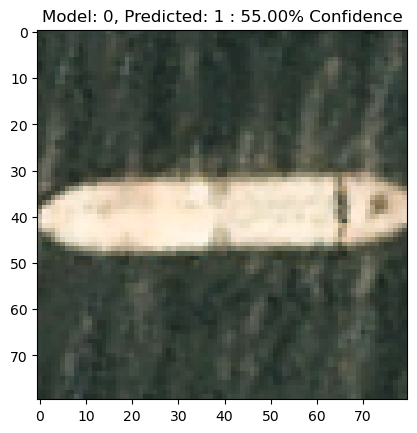

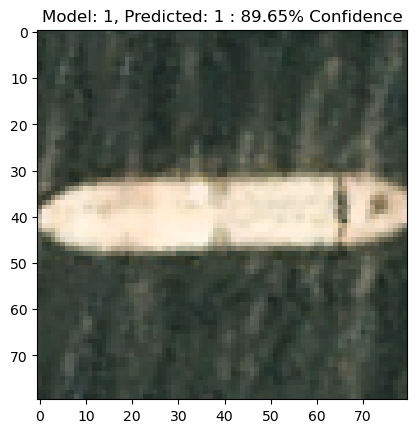

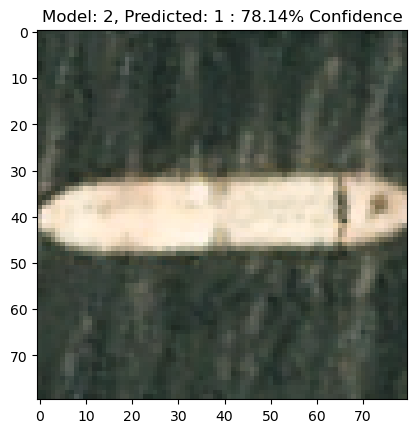

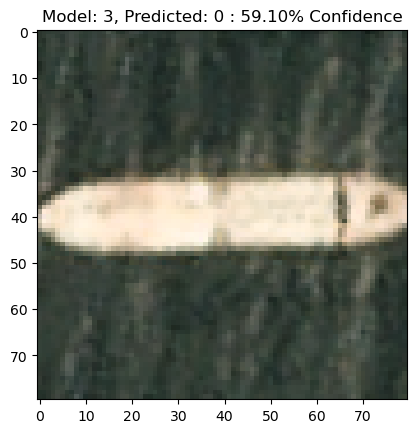

In [285]:
%matplotlib inline
for i in range(len(models)):
    plt.figure()
    plt.imshow(examples[5])
    confidence = tf.nn.softmax(poison_models[i](np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
    if confidence < 0.5:
        pred = 0
        confidence = 1. - confidence
    else:
        pred = 1
    plt.title('Model: {}, Predicted: {} : {:.2f}% Confidence'.format(str(i), str(pred), confidence*100))
    plt.show()

In [286]:
ensemble_predictions = np.stack([poison_models[i](examples) for i in range(len(models))])
print(ensemble_predictions.shape)

pred_classes = np.argmax(ensemble_predictions, axis=2)
print(pred_classes.shape)

class_predictions, count = stats.mode(pred_classes, axis=0)
print(mode.shape)

ensemble_confidence = count/(len(poison_models))
for i in range(10):
    print(f'Prediction: {class_predictions[i]}, Vote Confidence: {ensemble_confidence[i]}')

(4, 800, 2)
(4, 800)
(800,)
Prediction: 0, Vote Confidence: 0.75
Prediction: 0, Vote Confidence: 0.75
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 1, Vote Confidence: 0.75
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0
Prediction: 0, Vote Confidence: 1.0


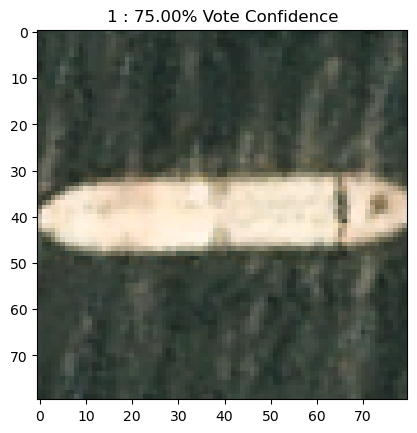

In [287]:
plt.figure()
plt.imshow(examples[5])
confidence = ensemble_confidence[5]
pred = class_predictions[5]
plt.title('{} : {:.2f}% Vote Confidence'.format(str(pred), confidence*100))
plt.show()